# NATURAL GAS PRICE PREDICTION 


# Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Data into a Pandas DataFrame for further analysis

In [3]:
data=pd.read_csv('../data/naturalgas.csv')
data

,Date,Price
0,07-01-1997,3.82
1,08-01-1997,3.80
2,09-01-1997,3.61
3,10-01-1997,3.92
4,13-01-1997,4.00
...,...,...
7214,23-09-2025,2.86
7215,24-09-2025,2.88
7216,25-09-2025,2.98
7217,26-09-2025,2.90


First 5 entries of the data

In [4]:
data.head()

,Date,Price
0,07-01-1997,3.82
1,08-01-1997,3.80
2,09-01-1997,3.61
3,10-01-1997,3.92
4,13-01-1997,4.00


Splitting the Date into 3 columns

In [5]:
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data['day'] = pd.DatetimeIndex(data['Date']).day

In [6]:
data.drop('Date',axis=1,inplace=True)

In [7]:
data

,Price,year,month,day
0,3.82,1997,7,1
1,3.80,1997,8,1
2,3.61,1997,9,1
3,3.92,1997,10,1
4,4.00,1997,1,13
...,...,...,...,...
7214,2.86,2025,9,23
7215,2.88,2025,9,24
7216,2.98,2025,9,25
7217,2.90,2025,9,26


# Handling Null Values

In [8]:
data.isnull().any()

Price     True
year     False
month    False
day      False
dtype: bool

As it is continuous data so we are checking it is normal distribution or skewed distribution?

C:\Users\saida\AppData\Local\Temp\ipykernel_12192\636118256.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'].dropna())


<Axes: xlabel='Price', ylabel='Density'>

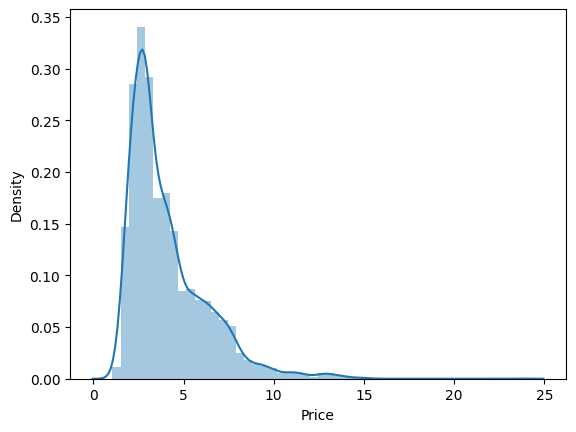

In [9]:
sns.distplot(data['Price'].dropna())

As we got Skew distribution curve so we are filling NULL values with median

In [10]:
data['Price'].fillna(data['Price'].median(),inplace=True)

In [11]:
data.isnull().sum()

Price    0
year     0
month    0
day      0
dtype: int64

In [12]:
data.describe()

,Price,year,month,day
count,7219.000000,7219.000000,7219.000000,7219.000000
mean,4.088025,2010.906635,6.534285,15.674470
std,2.157886,8.284370,3.413546,8.787704
min,1.050000,1997.000000,1.000000,1.000000
25%,2.590000,2004.000000,4.000000,8.000000
50%,3.380000,2011.000000,7.000000,16.000000
75%,5.070000,2018.000000,9.000000,23.000000
max,23.860000,2025.000000,12.000000,31.000000


# Finding and Removing Outliers

<Axes: ylabel='Price'>

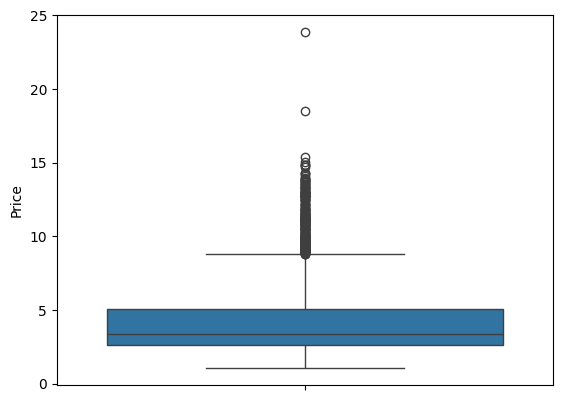

In [13]:
sns.boxplot(data['Price'])

In [14]:
from scipy import stats

In [15]:
z=np.abs(stats.zscore(data))
z

array([[0.12421564, 1.67877555, 0.13644104, 1.67000233],
       [0.13348461, 1.67877555, 0.42941185, 1.67000233],
       [0.22153984, 1.67877555, 0.72238265, 1.67000233],
       ...,
       [0.51351242, 1.70131708, 0.72238265, 1.06127556],
       [0.55058831, 1.70131708, 0.72238265, 1.17507881],
       [0.53668485, 1.70131708, 0.72238265, 1.51648854]])

In [16]:
threshold=3
np.where(z>threshold)

(array([1534, 1535, 1538, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171,
        2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182,
        2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193,
        2194, 2195, 2196, 2197, 2198, 2199, 2200, 2209, 2210, 2213, 2214,
        2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225,
        2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2818, 2819,
        2820, 2821, 2822, 2823, 2825, 2826, 2827, 2828, 2829, 2830, 2831,
        2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842,
        2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853,
        2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864,
        2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875,
        2876, 2878, 6061, 6062, 6790], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [17]:
df_no_outliers=data[(z<=3).all(axis=1)]
df_no_outliers

,Price,year,month,day
0,3.82,1997,7,1
1,3.80,1997,8,1
2,3.61,1997,9,1
3,3.92,1997,10,1
4,4.00,1997,1,13
...,...,...,...,...
7214,2.86,2025,9,23
7215,2.88,2025,9,24
7216,2.98,2025,9,25
7217,2.90,2025,9,26


In [18]:
df_no_outliers.shape

(7093, 4)

# Data Visualization

Scatter Plot

C:\Users\saida\AppData\Local\Temp\ipykernel_12192\2480314665.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


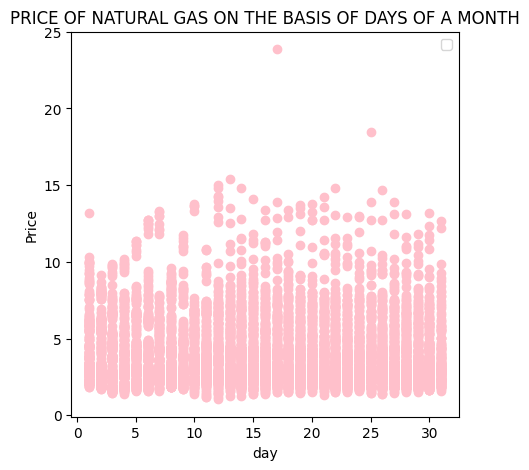

In [19]:
fig=plt.figure(figsize=(5,5))
plt.scatter(data['day'],data['Price'],color='pink')
plt.xlabel('day')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF A MONTH')
plt.legend()

C:\Users\saida\AppData\Local\Temp\ipykernel_12192\1620038980.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


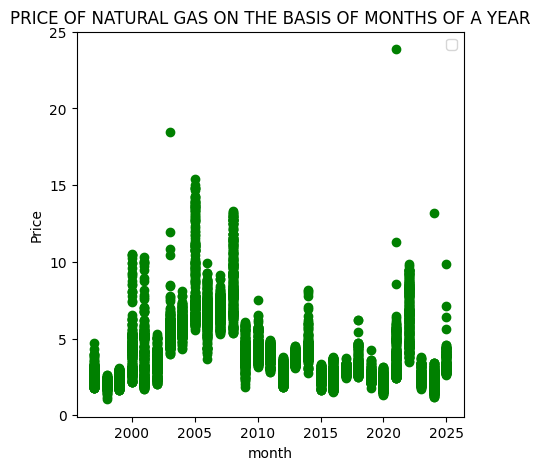

In [20]:
fig=plt.figure(figsize=(5,5))
plt.scatter(data['year'],data['Price'],color='green')
plt.xlabel('month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

HEAT MAP

<Axes: >

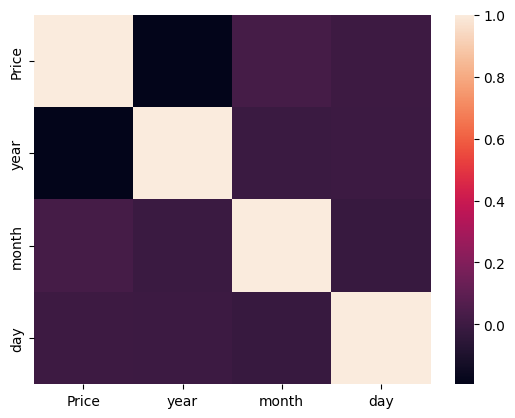

In [21]:
sns.heatmap(data.corr())

BAR GRAPH

C:\Users\saida\AppData\Local\Temp\ipykernel_12192\516618963.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


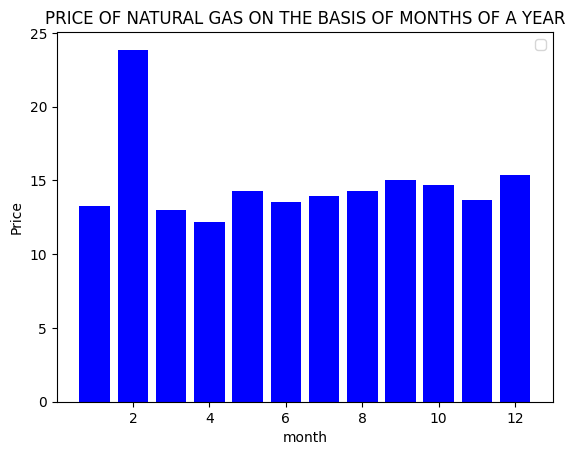

In [22]:
plt.bar(data['month'],data['Price'],color='blue')
plt.xlabel('month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

LINE GRAPH

<Axes: xlabel='year', ylabel='Price'>

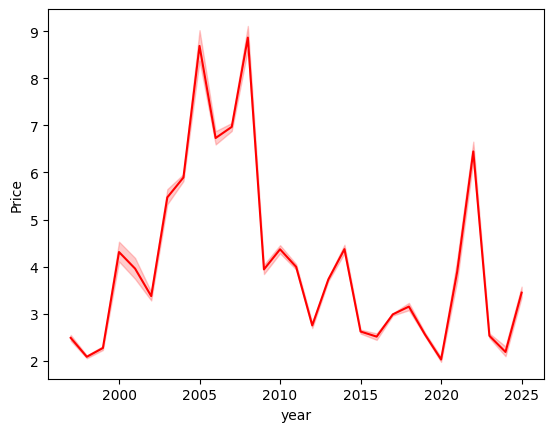

In [23]:
sns.lineplot(x='year',y='Price',data=data,color='red')

<Axes: xlabel='month', ylabel='Price'>

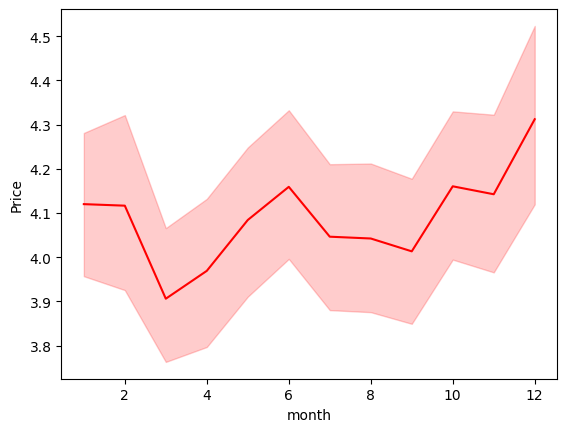

In [24]:
sns.lineplot(x='month',y='Price',data=data,color='red')

<Axes: xlabel='day', ylabel='Price'>

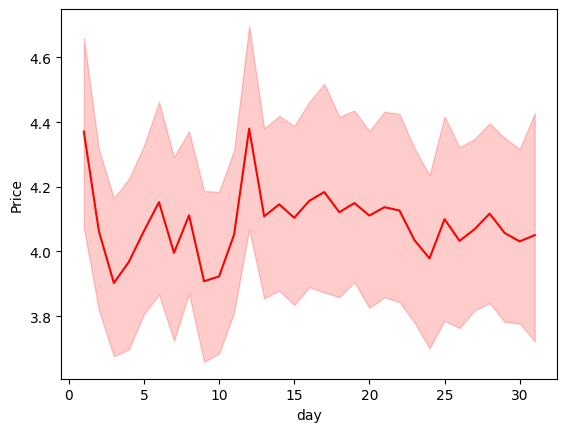

In [25]:
sns.lineplot(x='day',y='Price',data=data,color='red')

HISTOGRAM

<Axes: >

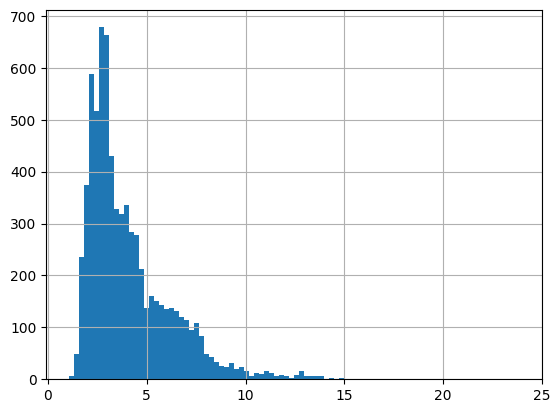

In [26]:
data['Price'].hist(bins=90)

BOX PLOT

<Axes: title={'center': 'Price'}, xlabel='month'>

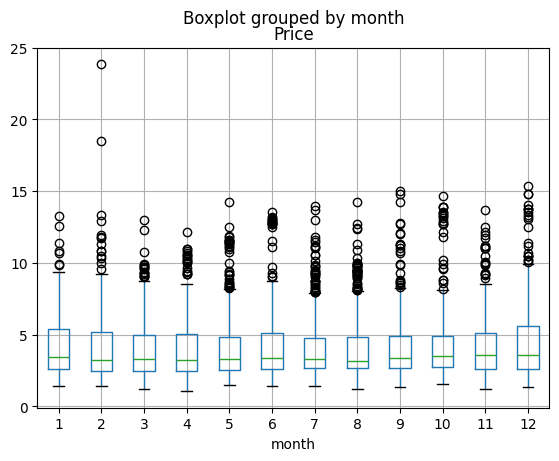

In [27]:
data.boxplot(column='Price',by='month')

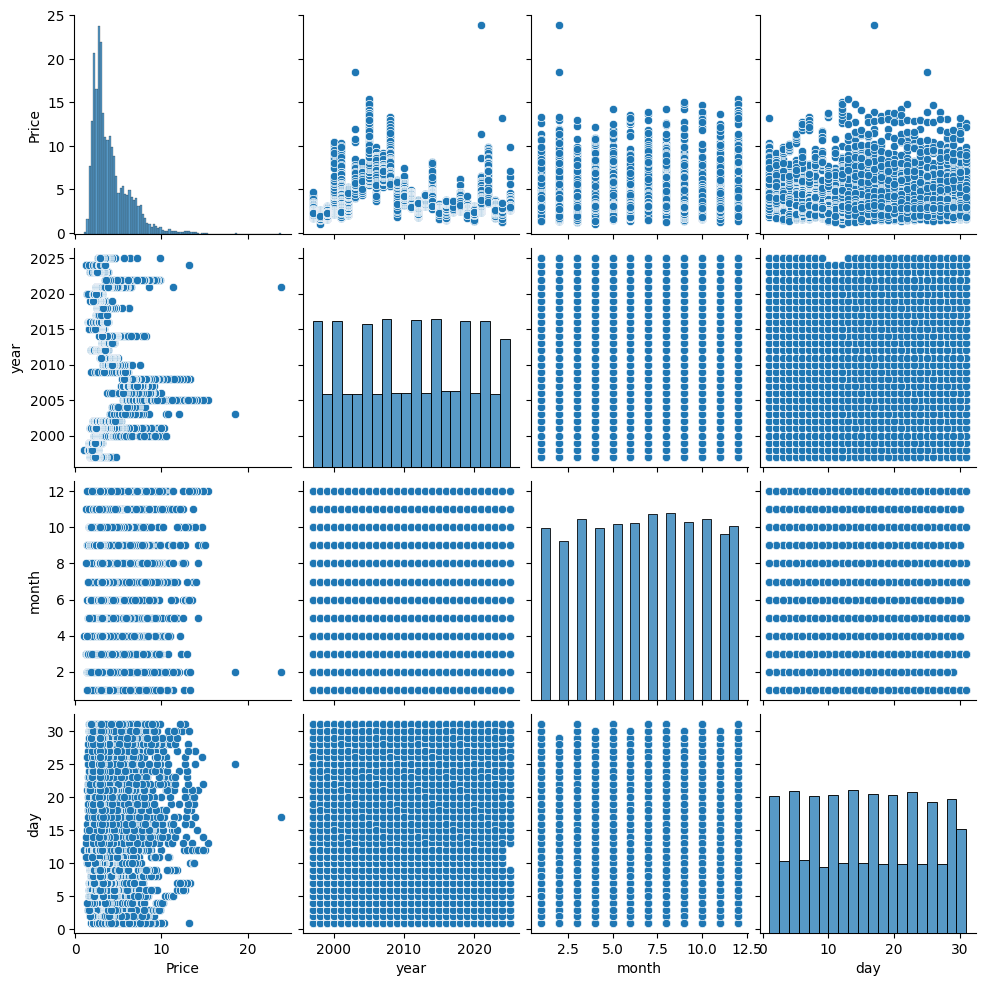

In [28]:
sns.pairplot(data)
plt.show()

# separating dependent and independent variables

In [29]:
x=data.iloc[:,1:4].values
y=data.iloc[:,0].values
x

array([[1997,    7,    1],
       [1997,    8,    1],
       [1997,    9,    1],
       ...,
       [2025,    9,   25],
       [2025,    9,   26],
       [2025,    9,   29]])

In [30]:
x

array([[1997,    7,    1],
       [1997,    8,    1],
       [1997,    9,    1],
       ...,
       [2025,    9,   25],
       [2025,    9,   26],
       [2025,    9,   29]])

In [31]:
y

array([3.82, 3.8 , 3.61, ..., 2.98, 2.9 , 2.93])

# Encoding

Since in our dataset we are having all the columns as numerical value, there isn't any requirement for encoding.

# Standardizing

In [32]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.67877555,  0.13644104, -1.67000233],
       [-1.67877555,  0.42941185, -1.67000233],
       [-1.67877555,  0.72238265, -1.67000233],
       ...,
       [ 1.70131708,  0.72238265,  1.06127556],
       [ 1.70131708,  0.72238265,  1.17507881],
       [ 1.70131708,  0.72238265,  1.51648854]])

# Train and Test


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
x_train.shape

(5775, 3)

In [35]:
y_train.shape

(5775,)

# Model Building


## Decision Tree Regressor

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

### Performing Hyper tuning for DecisionTreeRegressor

In [37]:
DecisionTreeRegressor()
df_grid = GridSearchCV(DecisionTreeRegressor(),param_grid = {'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],'splitter': ['best', 'random'],'max_depth': range(1, 11),'min_samples_split': range(10, 60, 10),},cv=5,n_jobs=1,scoring='neg_mean_squared_error')
df_grid.fit(x_train, y_train)
print(df_grid.best_params_)

{'criterion': 'poisson', 'max_depth': 10, 'min_samples_split': 10, 'splitter': 'best'}


C:\Users\saida\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1000 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\saida\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saida\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local

In [38]:
df=DecisionTreeRegressor(criterion='squared_error',max_depth=10,min_samples_split=10,splitter='best')
df.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [39]:
y_pred_df=df.predict(x_test)
y_pred_df

array([2.90666667, 3.786     , 2.08      , ..., 1.72392157, 2.78904762,
       4.62846154])

In [40]:
y_test

array([2.87, 3.62, 1.99, ..., 1.68, 2.66, 4.53])

In [41]:
from sklearn.metrics import r2_score
accur_df=r2_score(y_test,y_pred_df)
print(accur_df)

0.8983191426103536


Saving the DecisionTreeRegressor model into the folder via joblib library.

In [42]:
import joblib
joblib.dump(df,"../models/DecisionTreeRegressor.save")

['../models/DecisionTreeRegressor.save']

### Visualization of the Decision Tree

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.499375 to fit



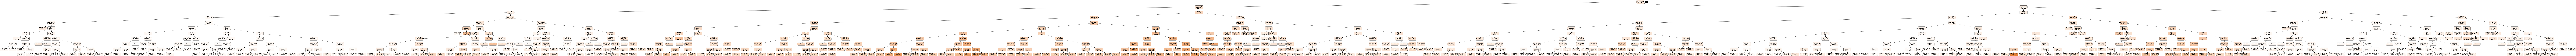

In [43]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(df, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Random Forest Regerssor

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rfr = RandomForestRegressor(n_estimators=1, random_state=10)
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
y_pred_rfr

array([3.09, 4.24, 1.96, ..., 1.89, 2.62, 4.53])

In [46]:
y_test

array([2.87, 3.62, 1.99, ..., 1.68, 2.66, 4.53])

In [47]:
accur_rfr=r2_score(y_test,y_pred_rfr)
print(accur_rfr)

0.8835630619774375


Saving the RandomForestRegressor model into the folder via joblib library.

In [48]:
joblib.dump(rfr,"../models/RandomForestRegressor.save")

['../models/RandomForestRegressor.save']

# Model Evaluation for Decision Tree Regressor

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,y_pred_df)

0.35531475216225844

In [50]:
mean_squared_error(y_test,y_pred_df)

0.5185888303307656

In [51]:
from math import sqrt
sqrt(mean_squared_error(y_test,y_pred_df))

0.7201311202348956

# Model Evaluation for Random Forest Regressor


In [52]:
mean_absolute_error(y_test,y_pred_rfr)

0.29113573407202215

In [53]:
mean_squared_error(y_test,y_pred_rfr)

0.5938472299168975

In [54]:
sqrt(mean_squared_error(y_test,y_pred_rfr))

0.7706148388896347

from the evaluation report we can see that the Random Forest Regressor is more closer to zero.